# Amazon Video Games



In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

data = pd.read_csv("../../data/amazon-video-games/ratings_Video_Games.csv",
                   delimiter=",",
                   encoding="ISO-8859-1")
data.columns=["user","game","rating","r_id"]

data.head()

,user,game,rating,r_id
0,1,0,4,1372896000
1,2,1,5,1404950400
2,3,1,5,1386115200
3,4,1,1,1366156800
4,5,1,5,1374192000


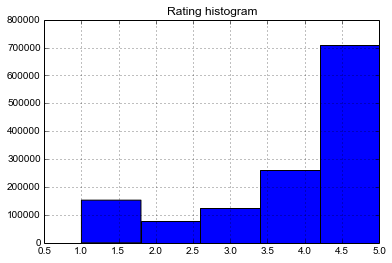

In [3]:
data["rating"].hist(bins=5).set_title("Rating histogram")

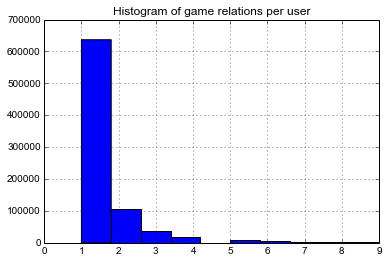

In [4]:
aux = data
aux["count"] = 1
games_per_user = aux.groupby("user").sum()["count"]
plot = games_per_user[games_per_user<10].hist(bins=10)
plot.set_title("Histogram of game relations per user")

## Sparsity    


Given that we have very different datasets, like *Jester* and *Amazon Books*, it's interesting to compare sparsity between the user-item matrices. Since at most each user has an edge with each artist, the maximum possible amount of edges is $|E|_{max} = |\mathrm{Artists}| * |\mathrm{Users}|$. So we define sparsity:    

\begin{equation}
    \mathrm{Sparsity} = \frac{|E|}{|E|_{max}}
\end{equation}    

In [5]:
n_users = data["user"].unique().shape[0]
n_games = data["game"].unique().shape[0]

sparsity = data.shape[0]/(n_users*n_games)
print("Sparsity is %.8f"%sparsity)

Sparsity is 0.00003191
